In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Init
T = 250
t_stimulus = 100
num_trials = 400
lr = 0.5

u = np.zeros(T)
u[t_stimulus] = 1
#u[50] = 0.1

#Reward(s)
sigma = 1.6
t_r1 = 200
r1 = [2 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(t - t_r1)**2 / (2 * sigma**2)) for t in range(T)]
#r1 = [np.random.uniform(0,0.5) if t in range(150,230) else 0 for t in range(T)]
sigma = 1.6
t_r2 = 150
r2 = [2 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(t - t_r2)**2 / (2 * sigma**2)) for t in range(T)]
t_r2 = 170
r3 = [2 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(t - t_r2)**2 / (2 * sigma**2)) for t in range(T)]
t_r2 = 215
r4 = [2 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(t - t_r2)**2 / (2 * sigma**2)) for t in range(T)]
t_r2 = 118
r5 = [2 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(t - t_r2)**2 / (2 * sigma**2)) for t in range(T)]

r = np.zeros(T)
r[:len(r1)] += r1
#r[:len(r2)] += r2
#r[:len(r2)] += r3
#r[:len(r2)] += r4
#r[:len(r2)] += r5


v = np.zeros((T,  num_trials))
w = np.zeros(T)
delta = np.zeros((T, num_trials))
delta_v = np.zeros((T, num_trials))


for n in range(num_trials):
  for t in range(1, T):
    for tau in range(t):
      v[t, n] += w[tau] * u[t-tau]
    delta_v[t, n] = v[t, n] - v[t-1, n]
    delta[t, n] = r[t] + delta_v[t, n]
    for tau in range(0,t):
      w[tau] += lr * delta[t, n] * u[t-tau-1]


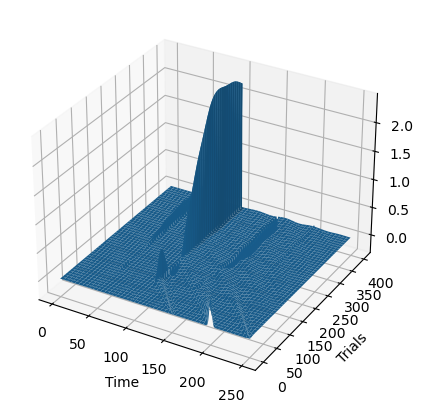

In [11]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(range(T), range(num_trials))

#ax.view_init(elev=20, azim=-70)

ax.plot_surface(X, Y, delta.T)
ax.set_xlabel('Time')
ax.set_ylabel('Trials')
ax.set_zlabel('$\delta$')
plt.show()

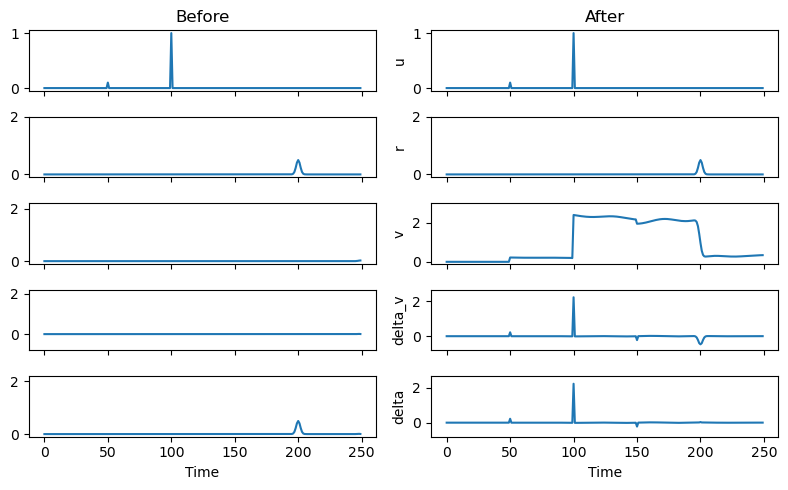

In [12]:
# Plot 2
fig, ax = plt.subplots(nrows= 5, ncols=2,figsize = (8,5), sharex =True)

# Before
ax[0][0].plot(range(T), u)
ax[1][0].plot(range(T), r)
ax[1][0].set_ylim(-0.1,2)
ax[2][0].plot(range(T), v[:,0])
ax[3][0].plot(range(T), delta_v[:,0])
ax[4][0].plot(range(T), delta[:,0]) 
ax[0][0].title.set_text('Before')
ax[2][0].set_ylim(-0.1,2.2)
ax[3][0].set_ylim(-0.8,2.2)
ax[4][0].set_ylim(-0.1,2.2)

ax[4][0].set_xlabel('Time')
ax[4][1].set_xlabel('Time')
ax[0][1].set_ylabel('u')
ax[1][1].set_ylabel('r')
ax[2][1].set_ylabel('v')
ax[3][1].set_ylabel('delta_v')
ax[4][1].set_ylabel('delta')

# After
ax[0][1].plot(range(T), u)
ax[1][1].plot(range(T), r)
ax[2][1].plot(range(T), v[:, num_trials-1])
ax[3][1].plot(range(T), delta_v[:, num_trials-1])
ax[4][1].plot(range(T), delta[:,num_trials-1]) 
ax[0][1].title.set_text('After')
lim = 2
ax[1][1].set_ylim(-0.1,2)
ax[2][1].set_ylim(-0.1, max(v.flatten()) + .2)
ax[3][1].set_ylim(-0.8,max(delta_v.flatten()) + .2)
ax[4][1].set_ylim(-0.8,max(delta.flatten()) + .2)

plt.tight_layout()
plt.show()